This notebook helps to have a first look at the saved output. 

# Select event type and parameter

In [1]:
# ------------------------------------------------------------------------------------------ which data do you want to read?
run = "r001" # 000, 001, ...
subsystem = "geds" # KEEP 'geds' for the moment
data_file = f"/data1/users/calgaro/prod-ref/generated/plt/phy/p03/{run}/l200-p03-{run}-phy-{subsystem}"


import shelve
import matplotlib
import ipywidgets as widgets
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib widget

# ------------------------------------------------------------------------------------------ load data
# Load the shelve object
shelf = shelve.open(data_file)

# ------------------------------------------------------------------------------------------ evt type
# Get the list of available event types
event_types = list(shelf['monitoring'].keys())

# Create a dropdown widget for the event type
evt_type_widget = widgets.Dropdown(
    options=event_types,
    description='Event Type:'
)

# ------------------------------------------------------------------------------------------ parameter
# Define a function to update the parameter dropdown based on the selected event type
def update_params(*args):
    selected_evt_type = evt_type_widget.value
    params = list(shelf['monitoring'][selected_evt_type].keys())
    param_widget.options = params

# Call the update_params function when the event type is changed
evt_type_widget.observe(update_params, 'value')

# Create a dropdown widget for the parameter
param_widget = widgets.Dropdown(
    description='Parameter:'
)

# ------------------------------------------------------------------------------------------ plot structure
plot_structures = ['per string', 'per channel']

# Create a dropdown widget 
plot_structures_widget = widgets.Dropdown(
    options=plot_structures,
    description='Plot structure:'
)

# ------------------------------------------------------------------------------------------ plot style
plot_styles = ['vs time', 'histogram']

# Create a dropdown widget 
plot_styles_widget = widgets.Dropdown(
    options=plot_styles,
    description='Plot style:'
)

# ------------------------------------------------------------------------------------------ resampling
# resampled='only' means you look at each timestamp entry mediated over 1H time window (to reduce the number of points in plots)
# resampled='no' means you look at each timestamp entry
# resampled='also' means you look at each timestamp entry mediated over 1H time window AND at each timestamp entry TOGETHER
#     \__suggestion: use 'also' just when you choose plot_structures='per channel'; 
#                    if you have selected 'per string', then you're not going to understand anything
resampled = ['no', 'only', 'yes']

# Create a dropdown widget 
resampled_widget = widgets.Dropdown(
    options=resampled,
    description='Resampled:'
)


# ------------------------------------------------------------------------------------------ get one or all strings
strings = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 'all']

# Create a dropdown widget 
strings_widget = widgets.Dropdown(
    options=strings,
    description='String:'
)

# ------------------------------------------------------------------------------------------ display widgets
display(evt_type_widget)
display(param_widget) # it takes a while before displaying available parameters in the corresponding widget

# ------------------------------------------------------------------------------------------ get params (based on event type)
evt_type = evt_type_widget.value
params = list(shelf['monitoring'][evt_type].keys())
param_widget.options = params

print("If you change me, then RUN AGAIN the next cell!!!")

Dropdown(description='Event Type:', options=('pulser',), value='pulser')

Dropdown(description='Parameter:', options=(), value=None)

If you change me, then RUN AGAIN the next cell!!!


In [2]:
# ------------------------------------------------------------------------------------------ get dataframe
def display_param_value(*args):
    selected_evt_type = evt_type_widget.value
    selected_param = param_widget.value
    print(f"You are going to plot '{selected_param}' for '{selected_evt_type}' events...")
    # get dataframe
    df_param = shelf['monitoring'][selected_evt_type][selected_param]["df_geds"]
    # get plot info
    plot_info = shelf['monitoring'][selected_evt_type][selected_param]['plot_info']
    
    return df_param, plot_info

df_param, plot_info = display_param_value()
print(f"...data have beeng loaded!")

You are going to plot 'baseline' for 'pulser' events...
...data have beeng loaded!


# Plot data (select style and string)

In [3]:
# ------------------------------------------------------------------------------------------ get plots
display(plot_structures_widget)
display(plot_styles_widget) 
display(resampled_widget)
display(strings_widget)
print("If you change me, then RUN AGAIN the next cell!!!")

Dropdown(description='Plot structure:', options=('per string', 'per channel'), value='per string')

Dropdown(description='Plot style:', options=('vs time', 'histogram'), value='vs time')

Dropdown(description='Resampled:', options=('no', 'only', 'yes'), value='no')

Dropdown(description='String:', options=(1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 'all'), value=1)

If you change me, then RUN AGAIN the next cell!!!


2023-03-27 12:06:34,019:  Plot style: vs time


Making plots now...


2023-03-27 12:06:34,531:  ... string 1


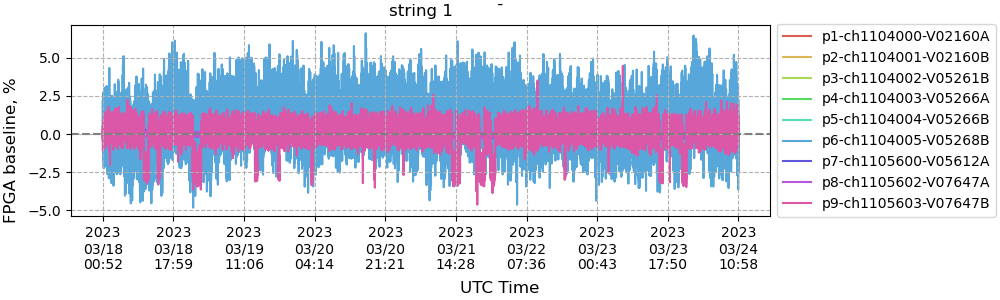

In [4]:
# set plotting options
plot_info['plot_style'] = plot_styles_widget.value
plot_info['resampled'] = resampled_widget.value
plot_info['title'] = "" # for plotting purposes
plot_info['subsystem'] = "" # for plotting purposes

from legend_data_monitor import plot_styles, plotting
print(f"Making plots now...")
if isinstance(strings_widget.value, str): # let's get all strings in output
    for string in [1,2,3,4,5,7,8,9,10,11]:
        if plot_structures_widget.value == "per channel": plotting.plot_per_ch(df_param[df_param['location'] == string], plot_info, "") # plot one canvas per channel
        elif plot_structures_widget.value == "per string": plotting.plot_per_string(df_param[df_param['location'] == string], plot_info, "") # plot one canvas per string
else: # let's get one string in output
    if plot_structures_widget.value == "per channel": plotting.plot_per_ch(df_param[df_param['location'] == strings_widget.value], plot_info, "") # plot one canvas per channel
    elif plot_structures_widget.value == "per string": plotting.plot_per_string(df_param[df_param['location'] == strings_widget.value], plot_info, "") # plot one canvas per string

# Plot means over channels

2023-03-27 12:06:36,748:  Plot style: vs ch
2023-03-27 12:06:41,310:  ... string 1
2023-03-27 12:06:41,701:  ..... average: 14987.78
2023-03-27 12:06:41,702:  ... string 2
2023-03-27 12:06:42,097:  ..... average: 15002.72
2023-03-27 12:06:42,098:  ... string 3
2023-03-27 12:06:42,478:  ..... average: 15030.45
2023-03-27 12:06:42,479:  ... string 4
2023-03-27 12:06:42,856:  ..... average: 15009.79
2023-03-27 12:06:42,857:  ... string 5
2023-03-27 12:06:43,214:  ..... average: 14999.09
2023-03-27 12:06:43,215:  ... string 7
2023-03-27 12:06:43,588:  ..... average: 15078.8
2023-03-27 12:06:43,589:  ... string 8
2023-03-27 12:06:43,989:  ..... average: 14950.4
2023-03-27 12:06:43,990:  ... string 9
2023-03-27 12:06:44,402:  ..... average: 15136.01
2023-03-27 12:06:44,403:  ... string 10
2023-03-27 12:06:44,835:  ..... average: 15012.77
2023-03-27 12:06:44,836:  ... string 11
2023-03-27 12:06:45,233:  ..... average: 14925.13


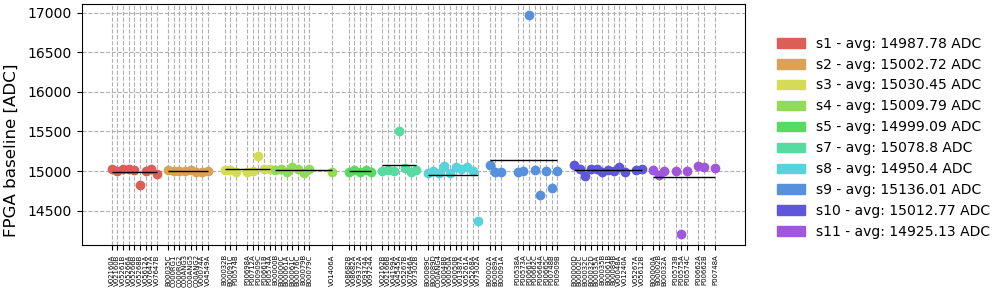

In [5]:
# ------------------------------------------------------------------------------------------ get means plot
# here you can monitor how the mean value (evaluated over the first 10% of data) behaves separately for different channels;
# these mean values were used to compute the % variations in 'vs time' plots.
# The legend of plot below shows the average of means of different channels belonging to the same string
plot_info["plot_style"] = "vs ch"
plot_info["unit_label"] = plot_info["unit"]
data = df_param.drop(columns=[param_widget.value])
data = data.rename(columns={param_widget.value + "_mean": param_widget.value})
plotting.plot_array(data, plot_info, "")